# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow  opencv-python matplotlib
#!pip install tensorflow --upgrade --force-reinstall
##### tensorflow-gpu

In [ ]:
!pip install tensorflow-gpu 
#opencv-python matplotlib

In [ ]:
!pip list

In [2]:
import tensorflow as tf
#!pip install opencv
# import opencv
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
# cpus = tf.config.experimental.list_physical_devices('CPU')
# for cpu in cpus: 
#     tf.config.experimental.set_memory_growth(cpu, True)

In [4]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# 2. Remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = r'C:\Users\salsa\ComputerVision-backup\ImageClassification-main\ImageClassification-main\data' 

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory(r'C:\Users\salsa\ComputerVision-backup\ImageClassification-main\ImageClassification-main\data')

Found 305 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

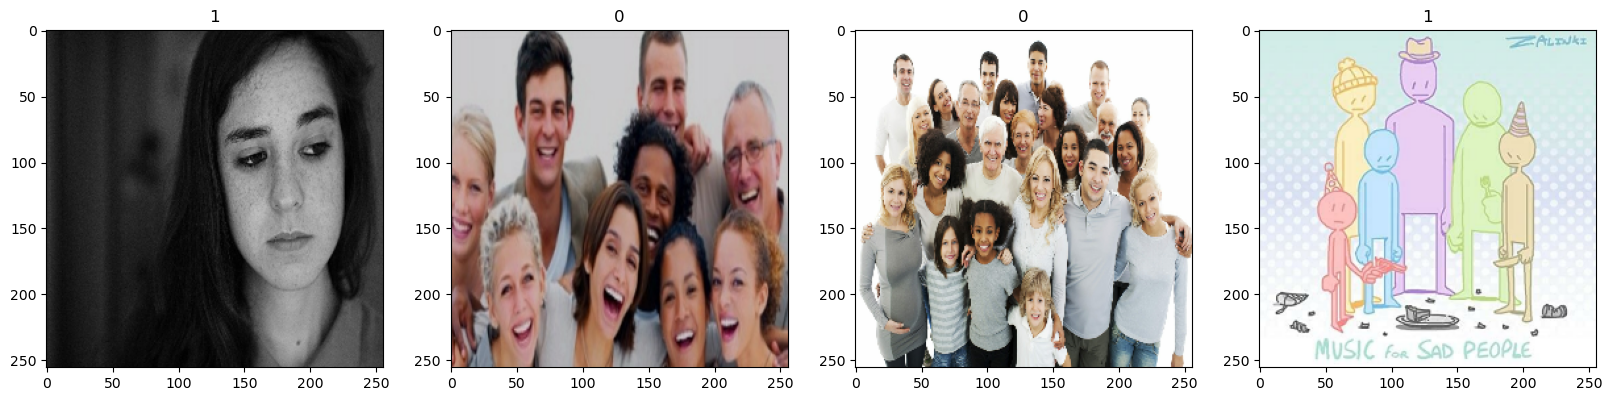

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
data.as_numpy_iterator().next()

(array([[[[1.69165709e-04, 1.38408315e-04, 3.07574024e-04],
          [1.69165709e-04, 1.38408315e-04, 3.07574024e-04],
          [1.69165709e-04, 1.38408315e-04, 3.07574024e-04],
          ...,
          [1.84544406e-04, 2.15301814e-04, 4.15224931e-04],
          [1.89045182e-04, 2.19802590e-04, 4.19725722e-04],
          [1.52484630e-04, 1.83242053e-04, 3.83165170e-04]],
 
         [[1.69165709e-04, 1.38408315e-04, 3.07574024e-04],
          [1.69165709e-04, 1.38408315e-04, 3.07574024e-04],
          [1.53787012e-04, 1.23029618e-04, 2.92195327e-04],
          ...,
          [1.94396387e-04, 2.25153781e-04, 4.55834292e-04],
          [1.78257862e-04, 2.09015256e-04, 4.39695752e-04],
          [1.62497599e-04, 1.93254993e-04, 4.23935504e-04]],
 
         [[1.69165709e-04, 1.38408315e-04, 3.07574024e-04],
          [1.69165709e-04, 1.38408315e-04, 3.07574024e-04],
          [1.53787012e-04, 1.23029618e-04, 2.92195327e-04],
          ...,
          [1.99923103e-04, 2.30680511e-04, 4.6136

# 5. Split Data

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [21]:
print(train_size, val_size,test_size)

7 2 1


In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [23]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 4s 520ms/step - loss: 0.6931 - accuracy: 0.5045 - val_loss: 0.6932 - val_accuracy: 0.4219
Epoch 2/20
7/7 [==============================] - 5s 533ms/step - loss: 0.6932 - accuracy: 0.4643 - val_loss: 0.6931 - val_accuracy: 0.5469
Epoch 3/20
7/7 [==============================] - 5s 533ms/step - loss: 0.6932 - accuracy: 0.4955 - val_loss: 0.6930 - val_accuracy: 0.5781
Epoch 4/20
7/7 [==============================] - 5s 543ms/step - loss: 0.6932 - accuracy: 0.4911 - val_loss: 0.6933 - val_accuracy: 0.4375
Epoch 5/20
7/7 [==============================] - 5s 560ms/step - loss: 0.6932 - accuracy: 0.4866 - val_loss: 0.6931 - val_accuracy: 0.5469
Epoch 6/20
7/7 [==============================] - 5s 551ms/step - loss: 0.6932 - accuracy: 0.4866 - val_loss: 0.6930 - val_accuracy: 0.5938
Epoch 7/20
7/7 [==============================] - 5s 666ms/step - loss: 0.6932 - accuracy: 0.4955 - val_loss: 0.6931 - val_accuracy: 0.5781
Epoch 8/20
7/7 [====

# 8. Plot Performance

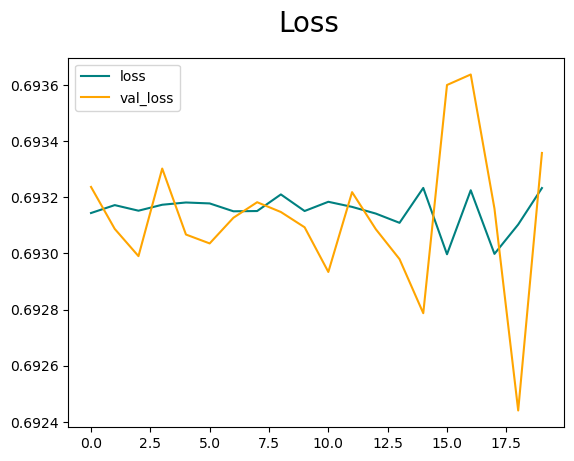

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

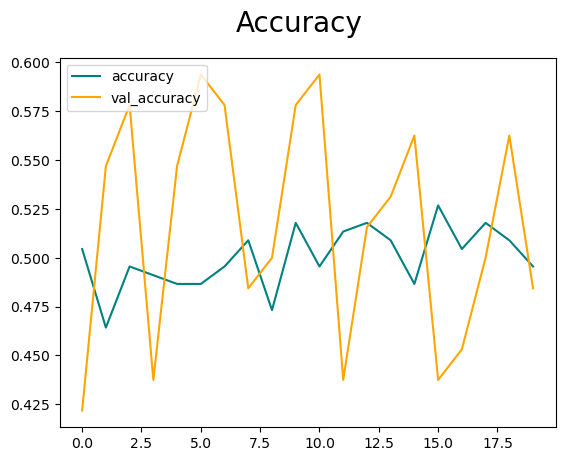

In [45]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [48]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 111ms/step


In [49]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.11764706, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.11764706, shape=(), dtype=float32)


# 10. Test

In [50]:
import cv2

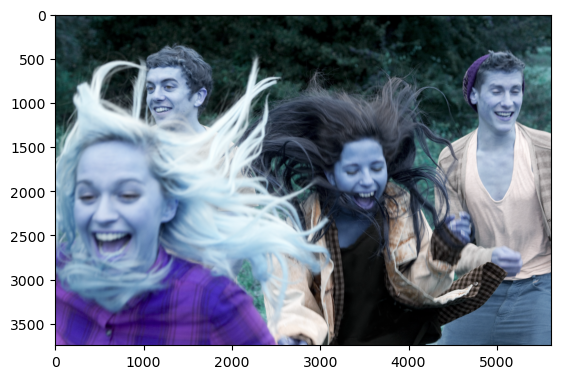

In [51]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

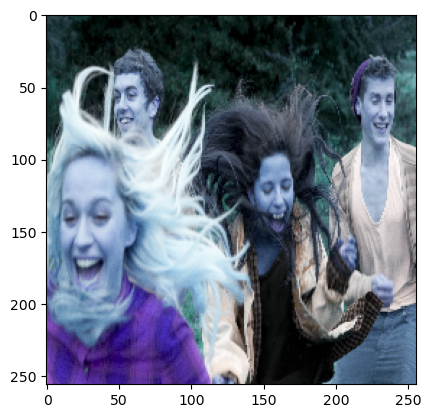

In [52]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 36ms/step


In [54]:
yhat

array([[1.6872269e-08]], dtype=float32)

In [55]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [56]:
from tensorflow.keras.models import load_model

In [57]:
model.save(os.path.join('models','imageclassifier.h5'))

C:\Users\salsa\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
new_model = load_model(r'C:\Users\salsa\ComputerVision-backup\ImageClassification-main\ImageClassification-main\models\imageclassifier.h5')

In [62]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 50ms/step


array([[0.01972744]], dtype=float32)

In [64]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
